In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import tracemalloc

In [2]:
def gen_cost_matrix(a, b):
    xlen = len(a) + 1
    ylen = len(b) + 1

    ret = np.matrix(np.ones((xlen,ylen)) * np.inf)
    ret[0,0] = 0
    for i in range(1, xlen):
        for j in range(1, ylen):
            dist = (a[i-1] - b[j-1])**2

            deletion = ret[i-1, j]
            insertion = ret[i, j-1]
            match = ret[i-1, j-1]

            ret[i,j] = dist + min(deletion, insertion, match)
    return ret

In [3]:
def cheapest_alignment(cost_matrix):
    dimensions = cost_matrix.shape
    rows, columns = dimensions
    i = rows - 1
    j = columns - 1

    cost = cost_matrix[i, j]
    path = [[]]
    path.append([i, j])
    while(i > 0 and j > 0):
        a = cost_matrix[i-1, j]
        b = cost_matrix[i, j-1]
        c = cost_matrix[i-1, j-1]
        tmp = np.array([a, b, c])
        ind = np.argmin(tmp)

        if ind == 0:
            cost += cost_matrix[i-1, j]
            i -= 1
        elif ind == 1:
            cost += cost_matrix[i, j-1]
            j -= 1
        else:
            cost += cost_matrix[i-1, j-1]
            i-=1
            j-=1
        path.append([i, j])
    path = path[1:] # Remove empty entry
    return cost, path

In [4]:
def cost(a, b):
    cost_matrix = gen_cost_matrix(a, b)
    cost, path = cheapest_alignment(cost_matrix)
    return cost, path

In [5]:
def plot_dtw_mapping(path, a, b):
    main_sample_time = np.arange(0, len(a))
    sample_time = np.arange(0, len(b))

    #DTW
    b = np.array(b)
    plt.plot(main_sample_time, a)
    plt.plot(sample_time, b + max(a))
    plt.title("Dynamic Time Warping Mapping")

    for j in range(1, len(path)-1):
        plt.plot([path[j][0]-1, path[j][1]-1], [a[path[j][0]-1], b[path[j][1]-1] + max(a)],'-k')
    plt.show()

In [6]:
step = 40
time1 = np.linspace(start=0, stop=1, num=step)
time2 = time1[0:step]
a = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
b = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 1.5)

DTW Cost: 852.7285117727972


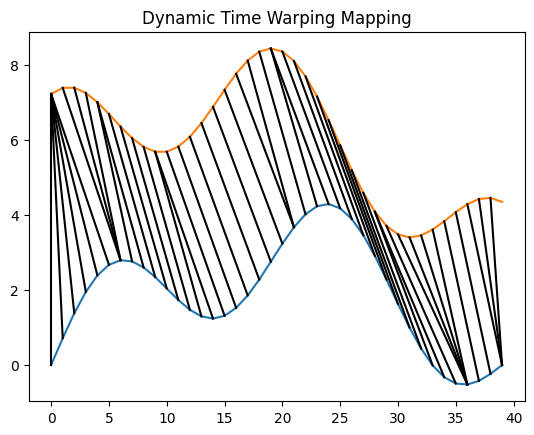

In [7]:
total_cost, path = cost(a, b)

print("DTW Cost: " + str(total_cost))
plot_dtw_mapping(path, a, b)

In [8]:
input_steps = []
times = []
for i in range(4, 200, 10):
    step = 10*i
    time1 = np.linspace(start=0, stop=1, num=step)
    time2 = time1[0:step]
    a = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
    b = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 


    # Start timer and  
    start = time.time()

    total_cost, path = cost(a, b)
    

    end = time.time()

    input_steps.append(step)
    times.append(end-start)
    print("Step: " + str(step) + " Time to run: " + str(end - start))



Step: 40 Time to run: 0.003679037094116211
Step: 140 Time to run: 0.029108762741088867
Step: 240 Time to run: 0.08826708793640137
Step: 340 Time to run: 0.16721105575561523
Step: 440 Time to run: 0.28192877769470215
Step: 540 Time to run: 0.419100284576416
Step: 640 Time to run: 0.5926740169525146
Step: 740 Time to run: 0.7861471176147461
Step: 840 Time to run: 1.0314249992370605
Step: 940 Time to run: 1.2712938785552979
Step: 1040 Time to run: 1.5600860118865967
Step: 1140 Time to run: 1.8964581489562988
Step: 1240 Time to run: 2.235095977783203
Step: 1340 Time to run: 2.5953688621520996
Step: 1440 Time to run: 3.041995048522949
Step: 1540 Time to run: 3.431957960128784
Step: 1640 Time to run: 4.384038209915161
Step: 1740 Time to run: 4.731022119522095
Step: 1840 Time to run: 4.944524049758911
Step: 1940 Time to run: 5.485506057739258


Text(0, 0.5, 'Seconds')

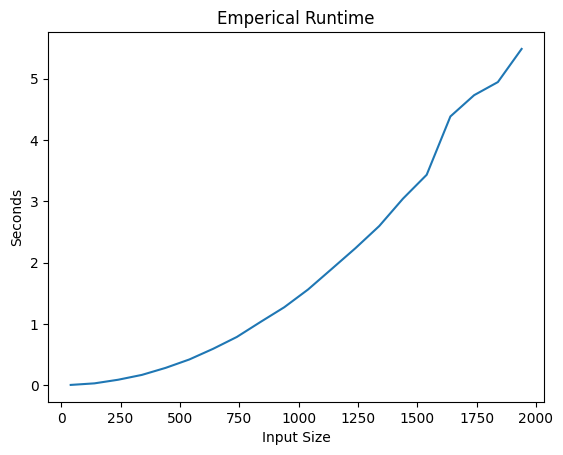

In [9]:
# Average time per x inputs
plt.plot(input_steps, times)
plt.title("Emperical Runtime of Cost Matrix Algorithm")
plt.xlabel("Input Size")
plt.ylabel("Seconds")

Interestingly, as we increase the input size, the time appears to grow logarithmically. The dynamic timewarping algorithm has a worst case runtime of O(nm). This is a great example to show that emperical runtime and asymptotic runtimes can be different when testing an algorithm on realworld data. 

In [10]:
input_steps = []
memory_usage =[]
for i in range(4, 200, 10):
    step = 10*i
    time1 = np.linspace(start=0, stop=1, num=step)
    time2 = time1[0:step]
    a = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
    b = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 


    # Start memeory monitor
    tracemalloc.start()

    total_cost, path = cost(a, b)

    mem_out = tracemalloc.get_traced_memory()
    # stopping the library
    tracemalloc.stop()  
    
    memory_usage.append(mem_out[1])
    input_steps.append(step)
    print("Step: " + str(step) + " Memory to run: " + str(mem_out[1]))

Step: 40 Memory to run: 28368
Step: 140 Memory to run: 322117
Step: 240 Memory to run: 931294
Step: 340 Memory to run: 1862558
Step: 440 Memory to run: 3113758
Step: 540 Memory to run: 4684432
Step: 640 Memory to run: 6575632
Step: 740 Memory to run: 8786832
Step: 840 Memory to run: 11318032
Step: 940 Memory to run: 14169232


KeyboardInterrupt: 

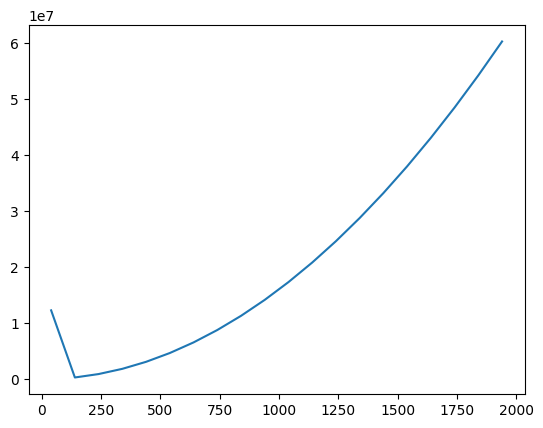

In [ ]:
#  Memory usage per x inputs
plt.title("Emperical Space Complexity of Cost Matrix Algorithm")
plt.xlabel("Input Size")
plt.ylabel("Seconds")
plt.plot(input_steps, memory_usage)

In [ ]:
def cost_analysis_time(a, b):
    start = time.time()
    cost_matrix = gen_cost_matrix(a, b)
    end = time.time()
    matrix_time = end-start

    start = time.time()
    cost, path = cheapest_alignment(cost_matrix)
    end = time.time()
    alignment_time = end - start
    return matrix_time, alignment_time

In [ ]:
input_steps = []
matrix_times = []
alignment_times = []
for i in range(4, 200, 10):
    step = 10*i
    time1 = np.linspace(start=0, stop=1, num=step)
    time2 = time1[0:step]
    a = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
    b = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

    matrix_time, alignment_time = cost_analysis_time(a, b)
    matrix_times.append(matrix_time)
    alignment_times.append(alignment_time)
    input_steps.append(step)

    print("=====================================================")
    print("Step: " + str(step) + " Time to run matrix: " + str(matrix_time))
    print("Step: " + str(step) + " Time to run alignment: " + str(alignment_time))

    


Step: 40 Time to run matrix: 0.0023610591888427734
Step: 40 Time to run alignment: 0.0008718967437744141
Step: 140 Time to run matrix: 0.029160022735595703
Step: 140 Time to run alignment: 0.0006999969482421875
Step: 240 Time to run matrix: 0.08365106582641602
Step: 240 Time to run alignment: 0.0011930465698242188
Step: 340 Time to run matrix: 0.16755294799804688
Step: 340 Time to run alignment: 0.0017437934875488281
Step: 440 Time to run matrix: 0.280318021774292
Step: 440 Time to run alignment: 0.0020940303802490234
Step: 540 Time to run matrix: 0.413604736328125
Step: 540 Time to run alignment: 0.0025920867919921875
Step: 640 Time to run matrix: 0.5926871299743652
Step: 640 Time to run alignment: 0.0030279159545898438
Step: 740 Time to run matrix: 0.7799708843231201
Step: 740 Time to run alignment: 0.003503084182739258
Step: 840 Time to run matrix: 1.0046310424804688
Step: 840 Time to run alignment: 0.00409698486328125
Step: 940 Time to run matrix: 1.283843994140625
Step: 940 Time t

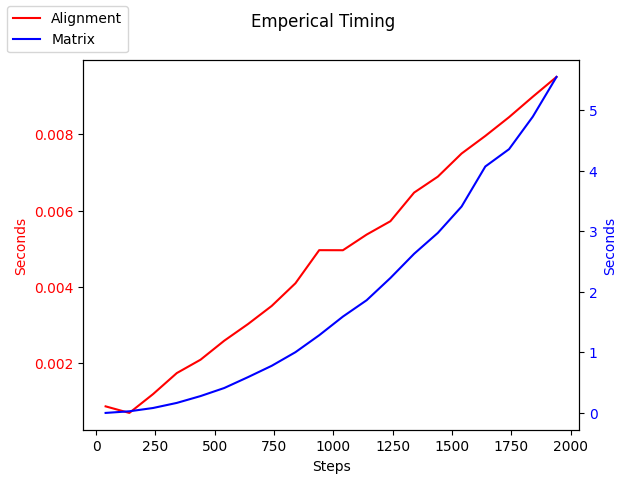

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

color = 'red'
ax1.set_xlabel('Input Size')
ax1.set_ylabel('Seconds', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(input_steps, alignment_times, color = color, label = 'Alignment')

color = 'blue'
ax2.set_ylabel('Seconds', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(input_steps, matrix_times, color = 'blue', label = 'Matrix')

fig.suptitle("Emperical Timing")
fig.legend(loc="upper left")

plt.show()

In [ ]:
def cost_analysis_space(a, b):
    tracemalloc.start()
    cost_matrix = gen_cost_matrix(a, b)
    mem_out_matrix = tracemalloc.get_traced_memory()
    tracemalloc.stop()  

    tracemalloc.start()
    cost, path = cheapest_alignment(cost_matrix)
    mem_out_alignment = tracemalloc.get_traced_memory()
    tracemalloc.stop() 

    return mem_out_matrix[1], mem_out_alignment[1]

In [ ]:
input_steps = []
matrix_spaces = []
alignment_spaces = []
for i in range(4, 200, 10):
    step = 10*i
    time1 = np.linspace(start=0, stop=1, num=step)
    time2 = time1[0:step]
    a = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
    b = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

    matrix_space, alignment_space = cost_analysis_space(a, b)
    matrix_spaces.append(matrix_space)
    alignment_spaces.append(alignment_space)
    input_steps.append(step)

    print("=====================================================")
    print("Step: " + str(step) + " Space to run matrix: " + str(matrix_space))
    print("Step: " + str(step) + " Space to run alignment: " + str(alignment_space))

Step: 40 Space to run matrix: 17340432
Step: 40 Space to run alignment: 5296
Step: 140 Space to run matrix: 319568
Step: 140 Space to run alignment: 15656
Step: 240 Space to run matrix: 930768
Step: 240 Space to run alignment: 27664
Step: 340 Space to run matrix: 1862558
Step: 340 Space to run alignment: 46064
Step: 440 Space to run matrix: 3113758
Step: 440 Space to run alignment: 66160
Step: 540 Space to run matrix: 4684432
Step: 540 Space to run alignment: 85984
Step: 640 Space to run matrix: 6575632
Step: 640 Space to run alignment: 105280
Step: 740 Space to run matrix: 8786832
Step: 740 Space to run alignment: 122088
Step: 840 Space to run matrix: 11318032
Step: 840 Space to run alignment: 146096
Step: 940 Space to run matrix: 14169232
Step: 940 Space to run alignment: 165776
Step: 1040 Space to run matrix: 17340432
Step: 1040 Space to run alignment: 184176
Step: 1140 Space to run matrix: 20831632
Step: 1140 Space to run alignment: 204448
Step: 1240 Space to run matrix: 24642832
S

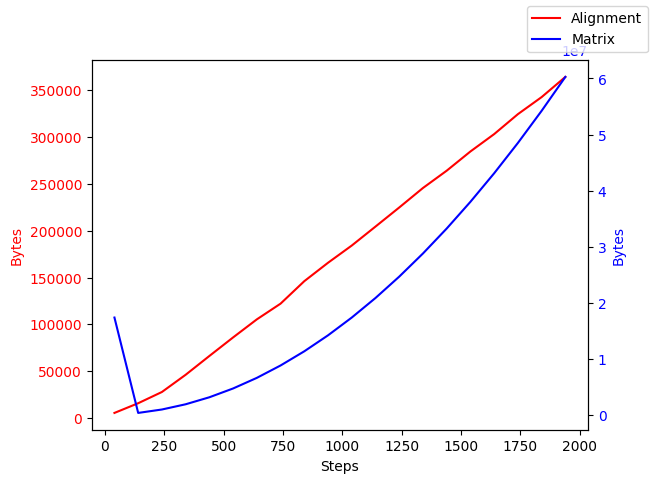

In [ ]:


fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

color = 'red'
ax1.set_xlabel('Input Size')
ax1.set_ylabel('Bytes', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(input_steps, alignment_spaces, color = color, label = 'Alignment')

color = 'blue'
ax2.set_ylabel('Bytes', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(input_steps, matrix_spaces, color = 'blue', label = 'Matrix')

fig.legend(loc="upper left")
fig.suptitle("Emperical Space")

plt.show()

In [ ]:
import fastdtw 

input_steps = []

custom_dtw_times = []
fast_dtw_times = []
for i in range(4, 200, 10):
    step = 10*i
    time1 = np.linspace(start=0, stop=1, num=step)
    time2 = time1[0:step]
    a = 3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1)
    b = 3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5) 

    # Start timer and  
    start_custom = time.time()
    total_cost, path = cost(a, b)
    end_custom = time.time()

    start_fast = time.time()
    dist, path_fast = fastdtw.fastdtw(a, b, dist = 2)
    end_fast = time.time()


    input_steps.append(step)
    custom_dtw_times.append(end_custom-start_custom)
    fast_dtw_times.append(end_fast-start_fast)


    print("Step: " + str(step) + " Time to run custom: " + str(end_custom - start_custom))
    print("Step: " + str(step) + " Time to run fast: " + str(end_fast - start_fast))

Step: 40 Time to run custom: 0.003023862838745117
Step: 40 Time to run fast: 0.0060901641845703125
Step: 140 Time to run custom: 0.028461217880249023
Step: 140 Time to run fast: 0.016674041748046875
Step: 240 Time to run custom: 0.08236432075500488
Step: 240 Time to run fast: 0.02965402603149414
Step: 340 Time to run custom: 0.16428232192993164
Step: 340 Time to run fast: 0.04266786575317383
Step: 440 Time to run custom: 0.2762010097503662
Step: 440 Time to run fast: 0.05763411521911621
Step: 540 Time to run custom: 0.4528999328613281
Step: 540 Time to run fast: 0.0729207992553711
Step: 640 Time to run custom: 0.6113071441650391
Step: 640 Time to run fast: 0.08530879020690918
Step: 740 Time to run custom: 0.7817132472991943
Step: 740 Time to run fast: 0.0979151725769043
Step: 840 Time to run custom: 1.0097637176513672
Step: 840 Time to run fast: 0.11131000518798828
Step: 940 Time to run custom: 1.3594796657562256
Step: 940 Time to run fast: 0.12695693969726562
Step: 1040 Time to run cu

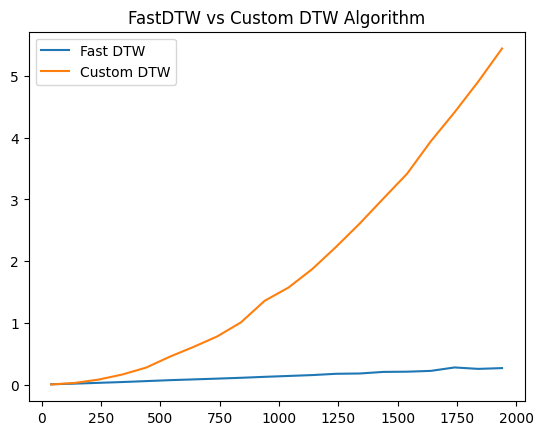

In [ ]:
plt.plot(input_steps, fast_dtw_times, label = "Fast DTW")
plt.plot(input_steps, custom_dtw_times, label = "Custom DTW")
plt.legend(loc="upper left")
plt.title("FastDTW vs Custom DTW Algorithm")
plt.show()

The above plot shows that the fastdtw algorithm is much more efficient emperically than the custom dynamic time warping algorithm I created earlier. This is because the fastdtw algorithm approximates the truw dynamic time warping in a O(n) time and space complexity. 